[2.05130416e+02 1.01193425e+01 1.45191781e+05 1.92684176e+06]


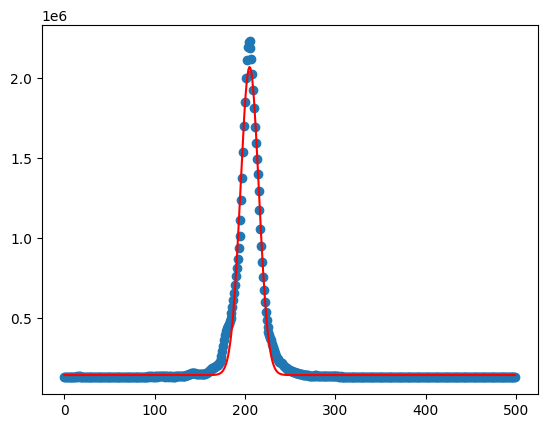

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import os
import matplotlib.pyplot as plt

os.chdir(r"C:\QuMix\Anirban\2024-06-26\dataset_1")

def gauss_fit(x,mu,sigma,C,A):
    y = C+(A*(np.exp((-1*(x-mu)**2)/(2*sigma**2))))
    return y

filename = 'test_1900.csv'
df = pd.read_csv(filename)
row_sums = df.sum(axis=1).tolist()
column_sums = df.sum(axis=0).tolist()
row_sum_partial = row_sums[800:1300]
x = np.arange(len(row_sum_partial))

popt, pcov = curve_fit(gauss_fit, x, row_sum_partial,p0=[250,100,2.2e6,0],maxfev=100000)
y_fit = gauss_fit(x,popt[0],popt[1],popt[2],popt[3])
fig = plt.figure()
plt.scatter(x,row_sum_partial)
plt.plot(x, y_fit,'r-')

print(popt)


[5.26000952e+01 1.90402984e+01 2.39581387e+05 1.11902980e+06]


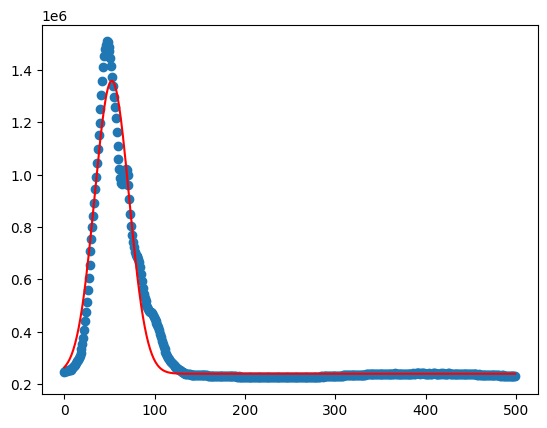

In [ ]:
#micron on x axis and pixel size on y-axis 
column_sum_partial = column_sums[500:1000]
#column_sum_partial = (column_sum_norm-np.min(column_sum_norm))
#column_sum_partial = column_sum_partial/np.max(column_sum_partial)
x = np.arange(len(column_sum_partial))
#y = gauss_fit(x,1,1,0.2,0)

import matplotlib.pyplot as plt



popt, pcov = curve_fit(gauss_fit, x, column_sum_partial,p0=[100,20,2e6,0],maxfev=100000)
y_fit = gauss_fit(x,popt[0],popt[1],popt[2],popt[3])
#y_fit_norm = y_fit/np.max(y_fit)
fig = plt.figure()
plt.scatter(x,column_sum_partial)
plt.plot(x, y_fit,'r-')

print(popt)
